In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [39]:
df = pd.read_csv("Accidental_Drug_Related_Deaths__2012-2017.csv")

In [40]:
print(df.head)

<bound method NDFrame.head of      CaseNumber        Date     Sex             Race   Age Residence City  \
0       14-9876  06/28/2014     NaN              NaN   NaN            NaN   
1      12-16897  11/30/2012    Male            White  45.0            NaN   
2      13-11849  08/12/2013    Male            White  30.0      NEW HAVEN   
3      14-17578  11/23/2014    Male            White  27.0      NAUGATUCK   
4      12-11497  08/14/2012    Male            White  21.0        ENFIELD   
5       13-2133  02/04/2013    Male            White  25.0        POMFRET   
6      14-14353  09/24/2014    Male            White  67.0      NEW HAVEN   
7      12-13673  09/30/2012  Female  Hispanic, White  32.0     MIDDLETOWN   
8       15-3929  03/02/2015    Male  Hispanic, White  61.0     BRIDGEPORT   
9      13-14184  09/30/2013    Male            White  37.0     EAST HAVEN   
10      15-7860  05/09/2015    Male            White  59.0        BRISTOL   
11       14-565  01/10/2014    Male           

In [41]:
df.describe()

,Age
count,4080.000000
mean,41.755882
std,12.319208
min,14.000000
25%,31.000000
50%,42.000000
75%,52.000000
max,87.000000


In [42]:
df["Age"].mode()

0    29.0
dtype: float64

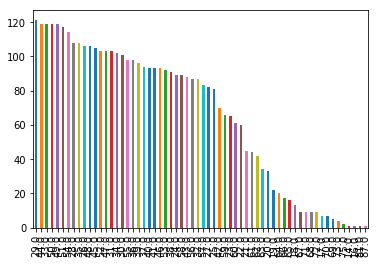

In [43]:
x = df["Age"]
#plt.tick_params(axis = "x", which="both", bottom=False, labelbottom=False)
#plt.xticks(np.arange(0, 90, 5))
x.value_counts().plot.bar()


In [44]:
df["Race"].value_counts()

White                     3244
Hispanic, White            432
Black                      329
Hispanic, Black             17
Unknown                     16
Asian, Other                14
Asian Indian                 9
Other                        7
Chinese                      2
Hawaiian                     1
Native American, Other       1
Name: Race, dtype: int64

In [45]:
df["Sex"].value_counts()

Male      2993
Female    1086
Name: Sex, dtype: int64

In [46]:
df["Heroin"].value_counts()

Y    2127
y      22
        5
Name: Heroin, dtype: int64

In [47]:
df.groupby("Sex").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Sex                                                               
Female  1086.0  42.537753  12.535221  14.0  32.0  44.0  52.0  81.0
Male    2992.0  41.468917  12.231539  16.0  31.0  41.0  51.0  87.0

In [48]:
df.dtypes

CaseNumber                object
Date                      object
Sex                       object
Race                      object
Age                      float64
Residence City            object
Residence State           object
Residence County          object
Death City                object
Death State               object
Death County              object
Location                  object
DescriptionofInjury       object
InjuryPlace               object
ImmediateCauseA           object
Heroin                    object
Cocaine                   object
Fentanyl                  object
Oxycodone                 object
Oxymorphone               object
EtOH                      object
Hydrocodone               object
Benzodiazepine            object
Methadone                 object
Amphet                    object
Tramad                    object
Morphine (not heroin)     object
Other                     object
Any Opioid                object
MannerofDeath             object
AmendedMan

In [157]:
drugs = df.iloc[:, 15:27]

In [273]:
drugs.head()

,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin)
0,NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN
1,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
drug_counts = {}

for drug in drugs:
    drug_counts[drug] = drugs[drug].value_counts().sum()
      
print(drug_counts)

#Other = drug_counts[:5].sum()
#cntry_counts = cntry_counts[:10]
#cntry_counts.loc[11] = other
#cntry_counts = cntry_counts.rename(index={11: 'Other'})

{'Heroin': 2154, 'Cocaine': 1176, 'Fentanyl': 1467, 'Oxycodone': 547, 'Oxymorphone': 97, 'EtOH': 1005, 'Hydrocodone': 106, 'Benzodiazepine': 1078, 'Methadone': 388, 'Amphet': 103, 'Tramad': 90, 'Morphine (not heroin)': 56}


In [275]:
Other_Count = []
for value in drug_counts.values():
    if value < 110:
        Other_Count.append(value)

drug_counts["Other"] = sum(Other_Count)

print(sum(Other_Count))
print(drug_counts)


452
{'Heroin': 2154, 'Cocaine': 1176, 'Fentanyl': 1467, 'Oxycodone': 547, 'Oxymorphone': 97, 'EtOH': 1005, 'Hydrocodone': 106, 'Benzodiazepine': 1078, 'Methadone': 388, 'Amphet': 103, 'Tramad': 90, 'Morphine (not heroin)': 56, 'Other': 452}


In [276]:
del drug_counts["Oxymorphone"]
del drug_counts["Hydrocodone"]
del drug_counts["Amphet"]
del drug_counts["Tramad"]
del drug_counts["Morphine (not heroin)"]

In [277]:
dcdf = pd.DataFrame()
dcdf["Drugs"] = drug_counts.keys()
dcdf["Counts"] = drug_counts.values()

sdcdf = dcdf.sort_values(by=["Counts"])

sdcdf

#dcdf["Counts"].sum()

,Drugs,Counts
6,Methadone,388
7,Other,452
3,Oxycodone,547
4,EtOH,1005
5,Benzodiazepine,1078
1,Cocaine,1176
2,Fentanyl,1467
0,Heroin,2154


In [278]:
Other = sdcdf[:5].sum()
sdcdf = sdcdf[5:]


#cntry_counts = cntry_counts[:10]
#cntry_counts.loc[11] = other
#cntry_counts = cntry_counts.rename(index={11: 'Other'})

In [279]:
#counts
fractions = []
for count in dcdf["Counts"]:
    fractions.append((count / 8267))


dcdf["Fractions"] = fractions

dcdf["Fractions"]

sdcdf = dcdf.sort_values(by=["Fractions"])

sdcdf

,Drugs,Counts,Fractions
6,Methadone,388,0.046934
7,Other,452,0.054675
3,Oxycodone,547,0.066167
4,EtOH,1005,0.121568
5,Benzodiazepine,1078,0.130398
1,Cocaine,1176,0.142252
2,Fentanyl,1467,0.177453
0,Heroin,2154,0.260554


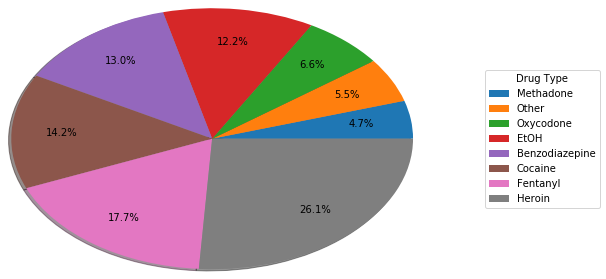

In [280]:

sizes = sdcdf["Fractions"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct="%1.1f%%", shadow=True, radius=1.5, rotatelabels=True, pctdistance = .75)

ax1.legend(sdcdf["Drugs"], title = "Drug Type", loc="center left", bbox_to_anchor=(1.3, 0, .5, 1))
plt.show()



In [54]:
df["Date"].head

<bound method NDFrame.head of 0       06/28/2014
1       11/30/2012
2       08/12/2013
3       11/23/2014
4       08/14/2012
5       02/04/2013
6       09/24/2014
7       09/30/2012
8       03/02/2015
9       09/30/2013
10      05/09/2015
11      01/10/2014
12      05/24/2015
13      11/02/2013
14      08/27/2012
15      04/19/2015
16      05/14/2014
17      01/06/2013
18      04/27/2013
19      03/08/2015
20      05/10/2015
21      04/09/2012
22      06/05/2015
23      06/16/2015
24      12/21/2013
25      12/23/2013
26      07/25/2013
27      05/03/2013
28      03/21/2012
29      07/12/2015
           ...    
4053    12/23/2017
4054    12/31/2017
4055    12/27/2017
4056    12/26/2017
4057    12/31/2017
4058    12/31/2017
4059    12/28/2017
4060    12/30/2017
4061    12/27/2017
4062    12/25/2017
4063    12/25/2017
4064    12/24/2017
4065    12/27/2017
4066    12/29/2017
4067    12/24/2017
4068    12/30/2017
4069    12/27/2017
4070    12/27/2017
4071    12/24/2017
4072    12/27/2017
4

In [324]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [318]:
monthdf = pd.DataFrame(df["Month"].value_counts().sort_values())

In [332]:
monthdf.index.astype(int)

Int64Index([4, 9, 8, 1, 2, 5, 3, 7, 6, 10, 12, 11], dtype='int64')

In [333]:
monthdf.columns = ["Deaths"]

#monthdf

#monthdf["Month"]

#monthdf = monthdf.astype(int)

monthdf

,Deaths
4.0,314
9.0,317
8.0,318
1.0,319
2.0,325
5.0,326
3.0,329
7.0,345
6.0,354
10.0,369


In [335]:
import calendar

monthdf.index.astype(int)

monthdf.apply(lambda x: calendar.month_abbr[x])

TypeError: ('list indices must be integers or slices, not Series', 'occurred at index Deaths')

In [119]:
df_month = df["Month"].value_counts().sort_values()


In [342]:
df_month.index = df_month.index.astype(int)

In [366]:
month_names = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

def mapper(month):
    return month_names[month]

for month in df_month.index:
    mapper(month)

df_month.index   
#df_month

Int64Index([4, 9, 8, 1, 2, 5, 3, 7, 6, 10, 12, 11], dtype='int64')

In [71]:
df_month.mean()

340.0833333333333

In [337]:
df_month.describe()

count     12.000000
mean     340.083333
std       25.949105
min      314.000000
25%      318.750000
50%      327.500000
75%      357.750000
max      388.000000
Name: Month, dtype: float64

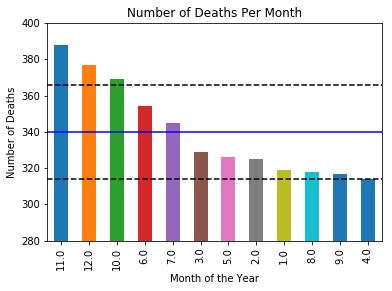

In [336]:
plt.ylabel("Number of Deaths")
plt.xlabel("Month of the Year")
my_xticks = ["November", "December", "October", "June", "July", "March", "May", 
             "February", "January", "August", "September", "April"]
plt.xticks(x, my_xticks)
plt.title("Number of Deaths Per Month")
plt.axhline(340, color="blue")
plt.axhline(df_month.mean() + df_month.std(), color = "black", linestyle = "dashed")
plt.axhline(df_month.mean() - df_month.std(), color = "black", linestyle = "dashed")
plt.ylim(280, 400)
df["Month"].value_counts().plot.bar()


In [87]:
df["Death City"].value_counts()

HARTFORD             428
NEW HAVEN            303
WATERBURY            283
BRIDGEPORT           271
NEW BRITAIN          169
NORWICH              124
MERIDEN              120
BRISTOL              117
DANBURY              111
NEW LONDON           110
TORRINGTON            88
MIDDLETOWN            82
MANCHESTER            79
ENFIELD               68
STAMFORD              60
WEST HAVEN            60
MILFORD               59
NORWALK               56
EAST HARTFORD         54
DERBY                 53
SOUTHINGTON           49
WILLIMANTIC           43
STRATFORD             43
VERNON                39
HAMDEN                38
NEW MILFORD           35
GROTON                33
NAUGATUCK             33
WALLINGFORD           31
BRANFORD              26
                    ... 
NEW PRESTON            1
OLD LYME               1
BOLTON                 1
MORRIS                 1
GALES FERRY            1
BARKHAMSTED            1
WASHINGTON             1
6340                   1
KENT                   1


In [59]:
df.index

RangeIndex(start=0, stop=4083, step=1)

In [60]:
Hartford_Resident = df["Death City"] == "NEW HAVEN"
H_Death = df["Heroin"] == "Y"
len(df[Hartford_Resident & H_Death].index)

147

In [61]:
Hartford = {}

def Hartfordcount(drug):
    Hartford_resident = df["Death City"] == "HARTFORD"
    drug_death = df[drug] == "Y"
    Hartford[drug] = len(df[Hartford_resident & drug_death])


Hartfordcount("Heroin")
Hartfordcount("Cocaine")
Hartfordcount("Fentanyl")
Hartfordcount("Oxycodone")
Hartfordcount("Oxymorphone")
Hartfordcount("EtOH")
Hartfordcount("Hydrocodone")
Hartfordcount("Benzodiazepine")
Hartfordcount("Methadone")
Hartfordcount("Amphet")
Hartfordcount("Tramad")
Hartfordcount("Morphine (not heroin)")


print(Hartford)

{'Heroin': 241, 'Cocaine': 157, 'Fentanyl': 178, 'Oxycodone': 28, 'Oxymorphone': 4, 'EtOH': 93, 'Hydrocodone': 4, 'Benzodiazepine': 61, 'Methadone': 23, 'Amphet': 8, 'Tramad': 7, 'Morphine (not heroin)': 0}


In [62]:
New_Haven = {}

def NHcount(drug):
    NH_resident = df["Death City"] == "NEW HAVEN"
    drug_death = df[drug] == "Y"
    New_Haven[drug] = len(df[NH_resident & drug_death])


NHcount("Heroin")
NHcount("Cocaine")
NHcount("Fentanyl")
NHcount("Oxycodone")
NHcount("Oxymorphone")
NHcount("EtOH")
NHcount("Hydrocodone")
NHcount("Benzodiazepine")
NHcount("Methadone")
NHcount("Amphet")
NHcount("Tramad")
NHcount("Morphine (not heroin)")


print(New_Haven)

{'Heroin': 147, 'Cocaine': 97, 'Fentanyl': 87, 'Oxycodone': 32, 'Oxymorphone': 2, 'EtOH': 70, 'Hydrocodone': 3, 'Benzodiazepine': 84, 'Methadone': 54, 'Amphet': 8, 'Tramad': 9, 'Morphine (not heroin)': 3}


In [63]:
Waterbury = {}

def Waterburycount(drug):
    Waterbury_resident = df["Death City"] == "WATERBURY"
    drug_death = df[drug] == "Y"
    Waterbury[drug] = len(df[Waterbury_resident & drug_death])


Waterburycount("Heroin")
Waterburycount("Cocaine")
Waterburycount("Fentanyl")
Waterburycount("Oxycodone")
Waterburycount("Oxymorphone")
Waterburycount("EtOH")
Waterburycount("Hydrocodone")
Waterburycount("Benzodiazepine")
Waterburycount("Methadone")
Waterburycount("Amphet")
Waterburycount("Tramad")
Waterburycount("Morphine (not heroin)")


print(Waterbury)

{'Heroin': 154, 'Cocaine': 103, 'Fentanyl': 86, 'Oxycodone': 27, 'Oxymorphone': 2, 'EtOH': 66, 'Hydrocodone': 3, 'Benzodiazepine': 69, 'Methadone': 38, 'Amphet': 6, 'Tramad': 7, 'Morphine (not heroin)': 2}


In [64]:
Bridgeport = {}

def Bridgeportcount(drug):
    Bridgeport_resident = df["Death City"] == "BRIDGEPORT"
    drug_death = df[drug] == "Y"
    Bridgeport[drug] = len(df[Bridgeport_resident & drug_death])


Bridgeportcount("Heroin")
Bridgeportcount("Cocaine")
Bridgeportcount("Fentanyl")
Bridgeportcount("Oxycodone")
Bridgeportcount("Oxymorphone")
Bridgeportcount("EtOH")
Bridgeportcount("Hydrocodone")
Bridgeportcount("Benzodiazepine")
Bridgeportcount("Methadone")
Bridgeportcount("Amphet")
Bridgeportcount("Tramad")
Bridgeportcount("Morphine (not heroin)")


print(Bridgeport)

{'Heroin': 139, 'Cocaine': 101, 'Fentanyl': 115, 'Oxycodone': 25, 'Oxymorphone': 6, 'EtOH': 81, 'Hydrocodone': 5, 'Benzodiazepine': 70, 'Methadone': 35, 'Amphet': 5, 'Tramad': 2, 'Morphine (not heroin)': 1}


In [65]:
print(Bridgeport)
print(New_Haven)
print(Hartford)
print(Waterbury)

{'Heroin': 139, 'Cocaine': 101, 'Fentanyl': 115, 'Oxycodone': 25, 'Oxymorphone': 6, 'EtOH': 81, 'Hydrocodone': 5, 'Benzodiazepine': 70, 'Methadone': 35, 'Amphet': 5, 'Tramad': 2, 'Morphine (not heroin)': 1}
{'Heroin': 147, 'Cocaine': 97, 'Fentanyl': 87, 'Oxycodone': 32, 'Oxymorphone': 2, 'EtOH': 70, 'Hydrocodone': 3, 'Benzodiazepine': 84, 'Methadone': 54, 'Amphet': 8, 'Tramad': 9, 'Morphine (not heroin)': 3}
{'Heroin': 241, 'Cocaine': 157, 'Fentanyl': 178, 'Oxycodone': 28, 'Oxymorphone': 4, 'EtOH': 93, 'Hydrocodone': 4, 'Benzodiazepine': 61, 'Methadone': 23, 'Amphet': 8, 'Tramad': 7, 'Morphine (not heroin)': 0}
{'Heroin': 154, 'Cocaine': 103, 'Fentanyl': 86, 'Oxycodone': 27, 'Oxymorphone': 2, 'EtOH': 66, 'Hydrocodone': 3, 'Benzodiazepine': 69, 'Methadone': 38, 'Amphet': 6, 'Tramad': 7, 'Morphine (not heroin)': 2}


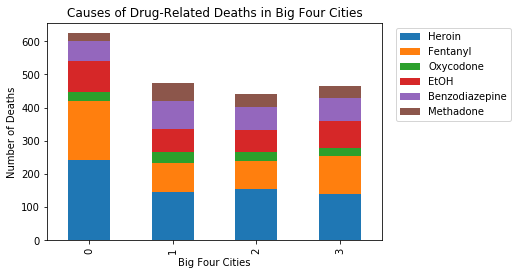

In [126]:
df3 = pd.DataFrame()
df3["Cities"] = ["Hartford", "New Haven", "Waterbury", "Bridgeport"]
df3["Heroin"] = [Hartford["Heroin"], New_Haven["Heroin"], Waterbury["Heroin"], Bridgeport["Heroin"]]
df3["Fentanyl"] = [Hartford["Fentanyl"], New_Haven["Fentanyl"], Waterbury["Fentanyl"], Bridgeport["Fentanyl"]]
df3["Oxycodone"] = [Hartford["Oxycodone"], New_Haven["Oxycodone"], Waterbury["Oxycodone"], Bridgeport["Oxycodone"]]
df3["EtOH"] = [Hartford["EtOH"], New_Haven["EtOH"], Waterbury["EtOH"], Bridgeport["EtOH"]]
df3["Benzodiazepine"] = [Hartford["Benzodiazepine"], New_Haven["Benzodiazepine"], Waterbury["Benzodiazepine"], Bridgeport["Benzodiazepine"]]
df3["Methadone"] = [Hartford["Methadone"], New_Haven["Methadone"], Waterbury["Methadone"], Bridgeport["Methadone"]]



df3.plot(kind="bar", stacked=True)
plt.xlabel("Big Four Cities")
plt.ylabel("Number of Deaths")
plt.title("Causes of Drug-Related Deaths in Big Four Cities")
plt.legend(loc = "upper right", bbox_to_anchor=(.9, 0, .5, 1))